In [40]:
# Clustering algorithms
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.vq import vq, kmeans, whiten

# Data Manipulation
import matplotlib.pyplot as plt, numpy as np

# Data Visualization
import seaborn as sns, pandas as pd

In [41]:
# Generate Random Data
x_coord = whiten(np.random.rand(50) * 10)
y_coord = whiten(np.random.rand(50) * 10)

# Build DataFrame
df = pd.DataFrame({'x': x_coord, 'y': y_coord})
df.head()

,x,y
0,1.362538,2.209264
1,1.579396,0.257764
2,1.917743,2.916391
3,3.462095,2.512988
4,2.427816,1.969010


In [42]:
# Calculate linkage matrix with 'ward' method
Z = linkage(df, method='ward')

# Add clustered column with new label
df['hierarchy'] = fcluster(Z, 3, criterion='maxclust')

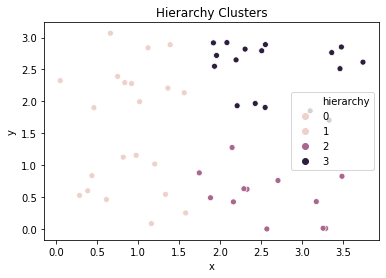

In [43]:
# Visualize Hierarchy Clusters
sns.scatterplot(x='x', y='y', hue='hierarchy', data=df)
plt.title('Hierarchy Clusters')
plt.show()

In [44]:
# Calculate Centroids with kmeans
centroids, _ = kmeans(df, 3)

# Add label to DataFrame
df['kmeans'], _ = vq(df, centroids)

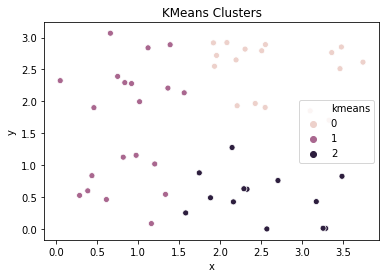

In [45]:
# Visualize Kmeans Clusters
sns.scatterplot(x='x', y='y', hue='kmeans', data=df)
plt.title('KMeans Clusters')
plt.show()
